#### **Find global minima point of a function:**
In this exercise, you will implement the Newton-Raphson method to find the global minima point of the following function:

$$f(x) = e^{x+4} + x^\frac{2}{3} + 8\sin(x)$$

Local maxima / minima of a function occurs at the roots of the first derivative of the function. We can find the local minima point of a function by finding the roots of the first derivative of the function. So, we have to find the roots of the following function to get the local minima point of $f(x)$:
$$
\begin{align*}
f'(x) &= \frac{d}{dx} \left( e^{x+4} + x^\frac{2}{3} + 8\sin(x) \right) \\ \\
&= e^{x+4} + \frac{2}{3}x^{-\frac{1}{3}} + 8\cos(x) \\
\end{align*}
$$

Follow the steps below to find the local minima point of $f(x)$:

* Plot the graph for function $f{(x)}$

* Use the graph to determine the range of $x$ where the global minimum point for function $f(x)$ can be found.

* Choose 5 initial values of $x$ from the range where the global minimum point for function $f(x)$ can be found. For each initial value of $x$, use the Newton-Raphson method to find the global minimum point of $f(x)$. Use error tolerance, $\epsilon = 0.001$ and maximum number of iterations, $N = 100$. Consider the following steps to implement the Newton-Raphson method:

    * **Step 1:** Calculate the value of $f'(x)$ and $f''(x)$ for the given value of $x$.
    * **Step 2:** Calculate the value of $x_{new} = x_{old} - \frac{f'(x_{old})}{f''(x_{old})}$.
    * **Step 3:** Check if the absolute relative approximate error, $\epsilon_{abs} = \left| \frac{x_{new} - x_{old}}{x_{new}} \right|$ is less than the error tolerance, $\epsilon$. If yes, then stop the iteration and return the value of $x_{new}$. If no, then set $x_{old} = x_{new}$ and repeat the steps 1 and 2.
    * **Step 4:** If the number of iterations exceeds the maximum number of iterations, $N$, then stop the iteration and return the value of $x_{new}$. If no, then repeat the steps 1 to 3.

* For each stationary(minimum/maximum) point found in previous step, check if the point is a local minimum point by checking the value of $f''(x)$ at that point. If the value of $f''(x)$ is positive, then the point is a local minimum point.

* Now, as you have found the local minima point of $f(x)$, find the global minima point of $f(x)$ by finding the local minima point with the smallest value of $f(x)$.

* Find the value of the function $f(x)$ at the global minimum point found in previous step. The value should be close to $-4$. If the value is not close to $-4$, then repeat all the steps with different initial values of $x$.

* Finally, plot the graph for function $f(x)$, its first derivative $f'(x)$ along with the local and global minima points found in previous steps. Mark the global minima point with a red circle and the local minima points with a blue circle.

C:\Users\USer\AppData\Local\Temp\ipykernel_22228\820077273.py:5: RuntimeWarning: invalid value encountered in scalar power
  return np.where(x > 0, np.exp(x + 4) + x**(2/3) + 8 * np.sin(x), np.exp(x + 4) + 8 * np.sin(x))
C:\Users\USer\AppData\Local\Temp\ipykernel_22228\820077273.py:5: RuntimeWarning: invalid value encountered in power
  return np.where(x > 0, np.exp(x + 4) + x**(2/3) + 8 * np.sin(x), np.exp(x + 4) + 8 * np.sin(x))


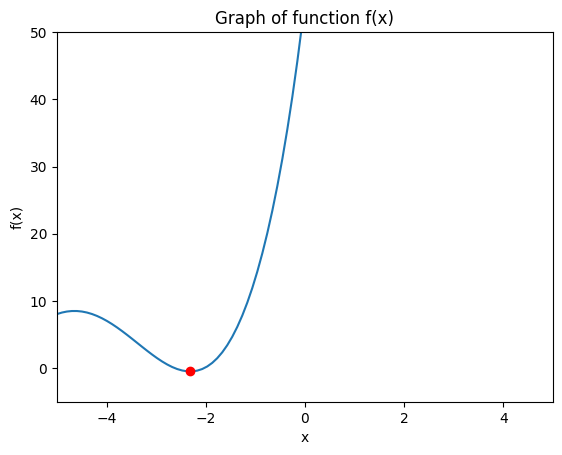

The global minima point of the function is -2.312640533680324


In [5]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return np.where(x > 0, np.exp(x + 4) + x**(2/3) + 8 * np.sin(x), np.exp(x + 4) + 8 * np.sin(x))



def f_prime(x):
    if x > 0:
        return np.exp(x + 4) + (2/3) * x**(-1/3) + 8 * np.cos(x)
    else:
        return np.exp(x + 4) + 8 * np.cos(x)

def f_prime_prime(x):
    if x > 0:
        return np.exp(x + 4) - (2/9) * x**(-4/3) - 8 * np.sin(x)
    else:
        return np.exp(x + 4) - 8 * np.sin(x)

def newton_raphson(x_init, epsilon, N):
    x_old = x_init
    x_new = 0
    i = 0

    if x_init == 0:
        
        return x_init

    try:
        while i < N:
            x_new = x_old - f_prime(x_old) / f_prime_prime(x_old)

            if np.abs(x_new - x_old) < epsilon:
                break

            x_old = x_new
            i += 1
    except ZeroDivisionError:
        print("The initial value of x_init is zero.")

    return x_new

x_init = [-1.5, -1, 0, 1, 1.5]
epsilon = 0.001
N = 100

x_min = None
f_min = np.inf

for x_i in x_init:
    x_new = newton_raphson(x_i, epsilon, N)
    if x_new is None:
        continue
    f_new = f(x_new)

    if f_new < f_min:
        x_min = x_new
        f_min = f_new

x = np.linspace(-5, 5, 100)
y = f(x)


plt.plot(x, y)

if x_min is not None:
    x_min = np.array(x_min)
    y_min = f(x_min)
    plt.plot(x_min, y_min, "ro")

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Graph of function f(x)")


plt.xlim(-5, 5)
plt.ylim(-5, 50)
plt.show()

if x_min is not None:
    print("The global minima point of the function is", x_min)


